In [1]:
#!pip install scanpy
#!pip install decoupler
#!pip install leidenalg
#!pip install omnipath

In [2]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc
from sklearn.metrics import davies_bouldin_score

In [3]:
!wget -O GTEX-1HSMQ-5005.h5ad  "https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680"

--2024-05-03 23:54:01--  https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:400d:80a::2001, 142.250.201.193
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:400d:80a::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444294630 (424M) [application/octet-stream]
Saving to: ‘GTEX-1HSMQ-5005.h5ad’

GTEX-1HSMQ-5005.h5a 100%[===================>] 423,71M   280KB/s    in 32m 37s 

2024-05-04 00:26:39 (222 KB/s) - ‘GTEX-1HSMQ-5005.h5ad’ saved [444294630/444294630]



In [4]:
adata = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
adata

AnnData object with n_obs × n_vars = 14404 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'A

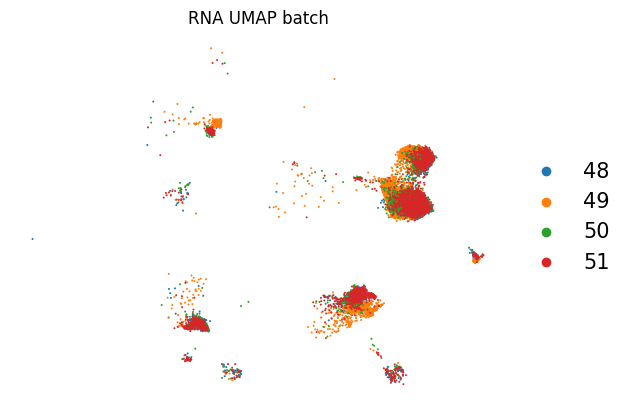

In [5]:
sc.pl.umap(adata, color='batch', title='RNA UMAP batch', frameon=False, legend_fontweight='normal', legend_fontsize=15)

## Filtering and quality control

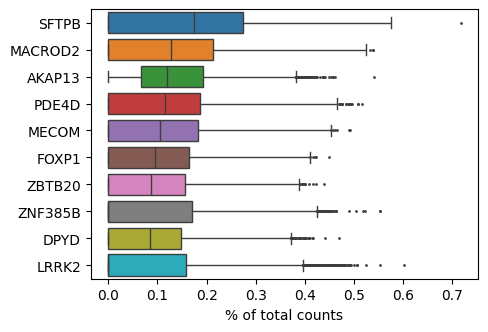

In [6]:
# Show most expressed genes in the data set
sc.pl.highest_expr_genes(adata, n_top=10)

In [35]:
# making a copy since we shouldn't change original object
ada = adata.copy()
ada

AnnData object with n_obs × n_vars = 14404 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'A

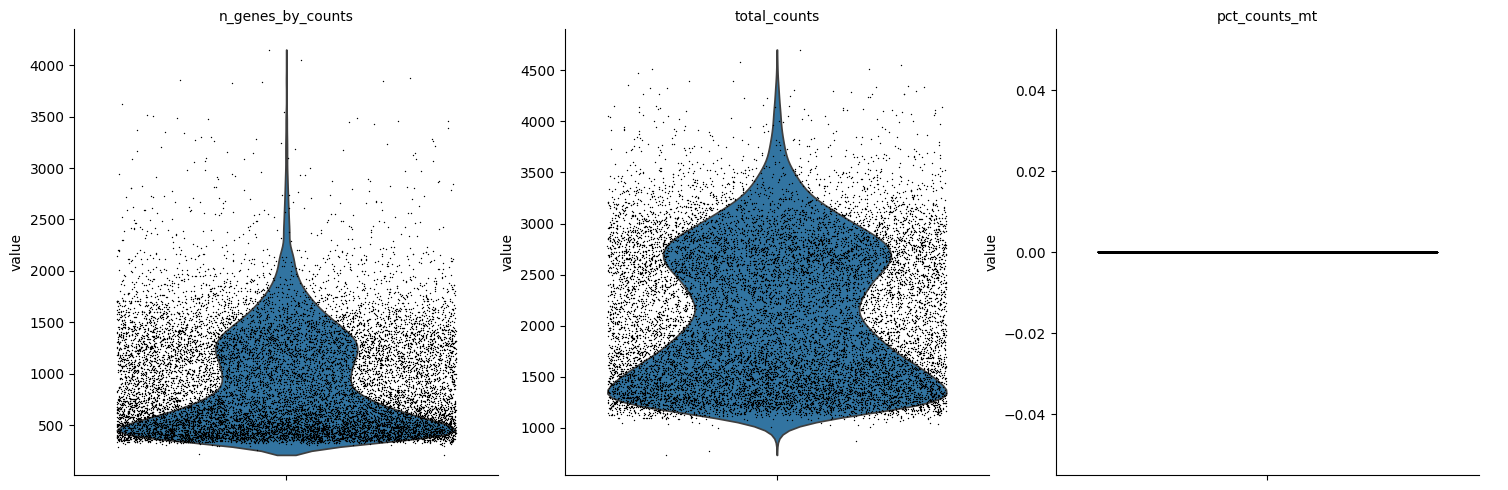

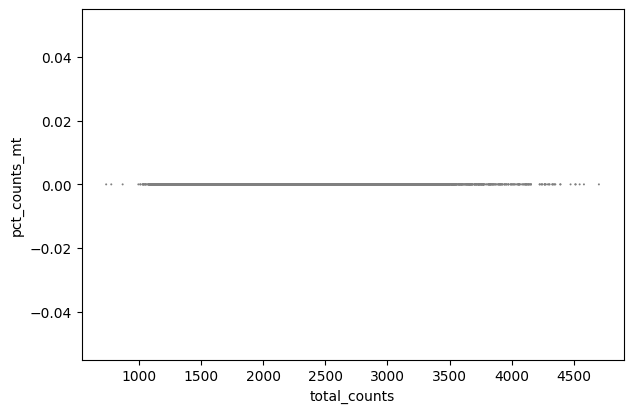

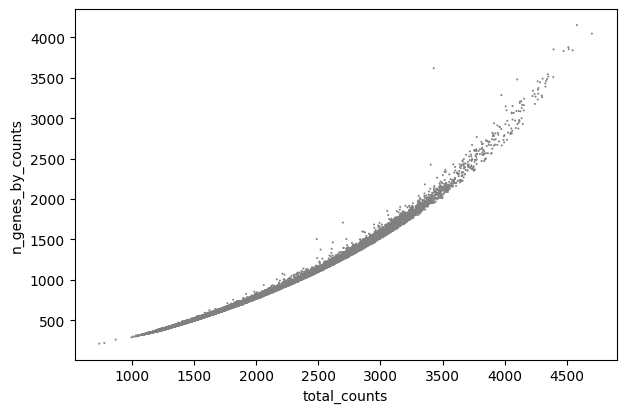

AnnData object with n_obs × n_vars = 14404 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', '

In [36]:
sc.pp.filter_cells(ada, min_genes=200)
sc.pp.filter_genes(ada, min_cells=3)

# Filter Mitochondrial genes that are not important in analysis
ada.var['mt'] = ada.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(ada, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(ada, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
sc.pl.scatter(ada, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(ada, x="total_counts", y="n_genes_by_counts")
ada

In [37]:
ada = ada[ada.obs.n_genes_by_counts < 2500, :]
ada

View of AnnData object with n_obs × n_vars = 14266 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_so

## Normalization and scaling

In [38]:
adaNormalized = ada.copy()

In [39]:
# Normalize the data
sc.pp.normalize_total(adaNormalized, target_sum=1e4)
sc.pp.log1p(adaNormalized) # log transformation
adaNormalized.layers['log_norm'] = adaNormalized.X.copy()

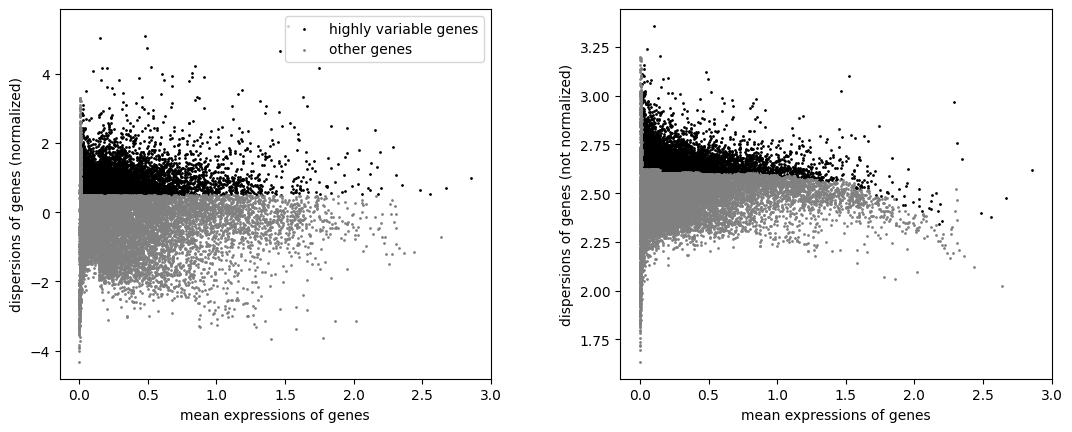

In [40]:
# Identify the highly variable genes
sc.pp.highly_variable_genes(adaNormalized, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adaNormalized)

In [41]:
# Regress and scale the data
sc.pp.regress_out(adaNormalized, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adaNormalized, max_value=10)

## Clustering when normalization is applied

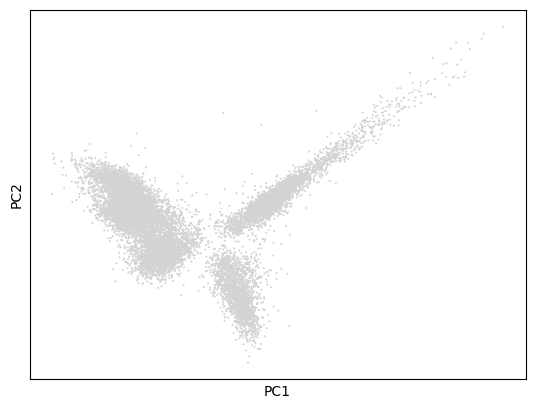

In [42]:
# Generate Principal Component Analysis (PCA) features
sc.tl.pca(adaNormalized, svd_solver='arpack')
sc.pl.pca(adaNormalized)

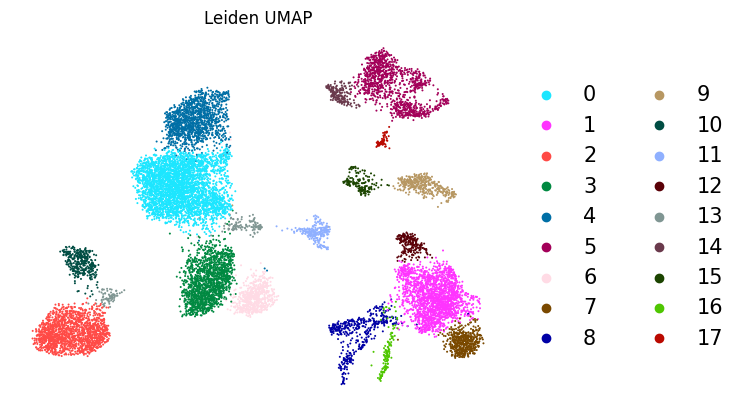

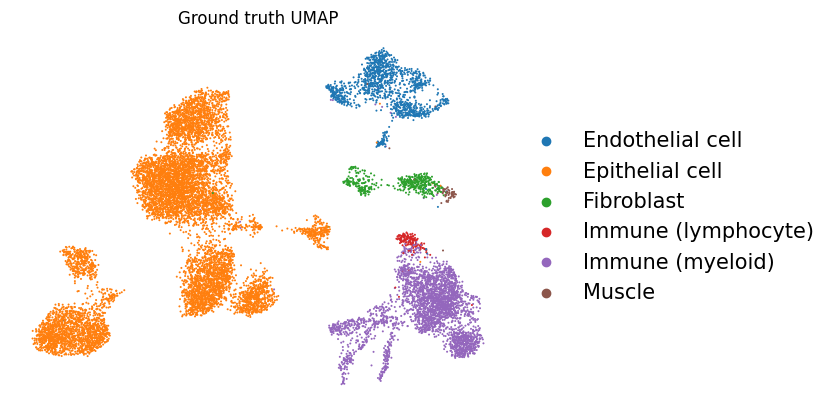

In [43]:
# Restore X to be norm counts
dc.swap_layer(adaNormalized, 'log_norm', X_layer_key=None, inplace=True)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(adaNormalized, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(adaNormalized)

# Run leiden clustering algorithm
sc.tl.leiden(adaNormalized, resolution=0.9)

# Visualize
sc.pl.umap(adaNormalized, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(adaNormalized, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

## Clustering when normalization was skipped

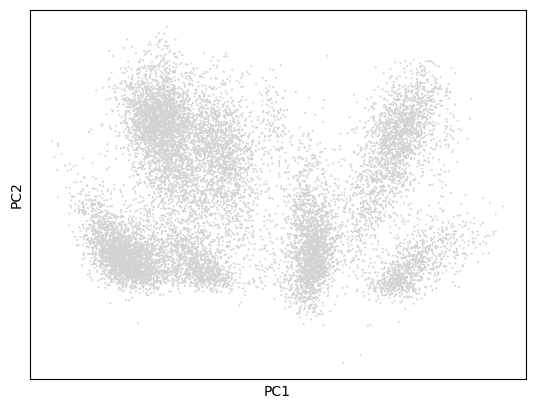

In [45]:
# Generate Principal Component Analysis (PCA) features
ada_copy = ada.copy()
sc.tl.pca(ada_copy, svd_solver='arpack')
sc.pl.pca(ada_copy)

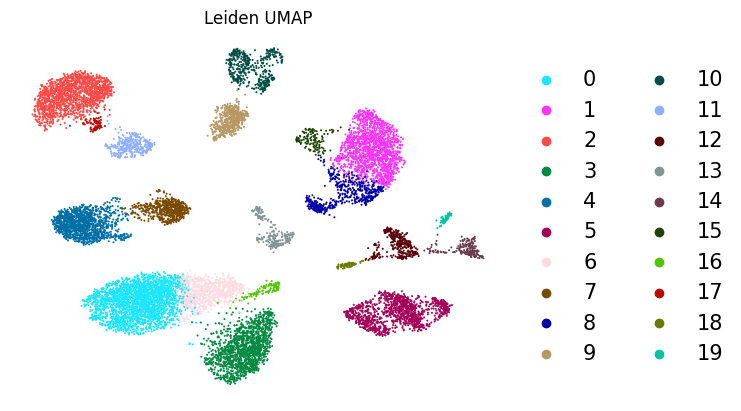

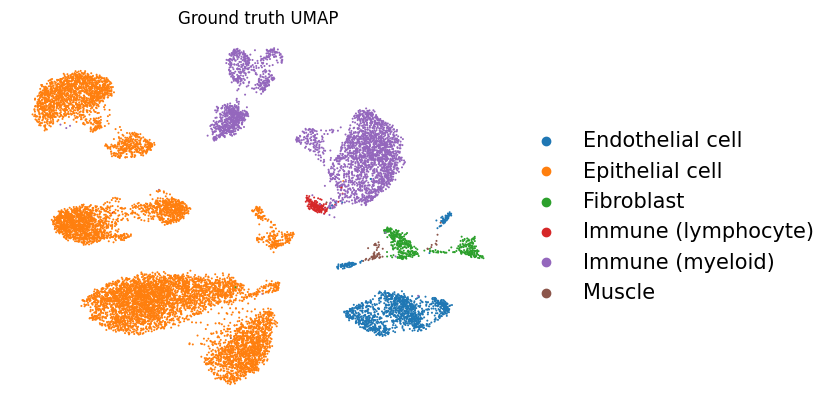

In [46]:
# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(ada_copy, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(ada_copy)

# Run leiden clustering algorithm
sc.tl.leiden(ada_copy, resolution=0.9)

# Visualize
sc.pl.umap(ada_copy, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(ada_copy, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

## Calculating Davies-Bouldin Scores

In [47]:
db_score_normalized = davies_bouldin_score(adaNormalized.obsm['X_umap'], adaNormalized.obs['leiden'])
print("Davies-Bouldin Score with normalization:", db_score_normalized)

db_score = davies_bouldin_score(ada_copy.obsm['X_umap'], ada_copy.obs['leiden'])
print("Davies-Bouldin Score without normalization:", db_score)

Davies-Bouldin Score with normalization: 0.9654170481808778
Davies-Bouldin Score without normalization: 0.5432114959736787


## Conclusion

The Davies-Bouldin Score is a measure of clustering quality where a lower score indicates better clustering. It quantifies the average similarity between each cluster's centroid and the centroids of the clusters that are closest to it. Lower scores indicate that clusters are more separated and compact, which is generally desirable in clustering tasks.

I was expecting to be better score when normalization is applied but whether normalization is beneficial or not depends on the characteristics of data and the specific clustering algorithm that is being used. Here it how it looks like when I calculate Davies-Bouldin score for each batch with normalization.

Davies-Bouldin Score with normalization for:
- 48 batch (3397 × 17695) - 0.5997917881187873
- 49 batch (5196 × 17695) - 0.5551601048224474
- 50 batch (2269 × 17695) - 0.9723287335704979
- 51 batch (3542 × 17695) - 0.5601101788300015

I noticed that batch 50 has really bad Davies-Bouldin score with normalization while the other batches are good, so when I removed that batch and did analysis again with normalization applied Davies-Boulding score was 0.6306915540931447 which was much better.